In [ ]:
import os

def count_files(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

directory_path = "/home/olisvalue/contests/baseline/data/test"  # Замените на путь к вашей директории
total_files = count_files(directory_path)
print(f"Total number of files: {total_files}")


In [31]:
!git add .

In [32]:
!git commit -m "added augmentations"

[augmentations e47ff01] added augmentations
 16 files changed, 56347 insertions(+), 63319 deletions(-)
 create mode 100644 best-model-epoch=11-max_secs=50.pt:Zone.Identifier
 rewrite models/__pycache__/data_loader.cpython-310.pyc (72%)
 rewrite models/__pycache__/utils.cpython-310.pyc (70%)
 rewrite trash.ipynb (98%)


In [ ]:
!git push origin coverhunter

In [ ]:
!nvidia-smi

In [ ]:
model

In [ ]:
def dataloader_factory(config: Dict, data_split: str) -> List[DataLoader]:
    return cover_dataloader(
        data_path=config["data_path"],
        file_ext=config["file_extension"],
        #dataset_path=config[data_split]["dataset_path"],
        data_split=data_split,
        debug=config["debug"],
        max_len=50,
        **config[data_split]
    )

In [ ]:
from models.data_loader import *
from models.train_module import TrainModule
from utils import initialize_logging, load_config

config = load_config(config_path="./config/config.yaml")

data = CoverDataset(
    data_path=config["data_path"],
    file_ext=config["file_extension"],
    data_split='train',
    debug=config["debug"],
    max_len=50,
    dataset_path="/home/olisvalue/contests/baseline/data/train")

In [ ]:
data[10]

In [ ]:
class zero:
    def item(self):
        return 0

In [ ]:
import os
import torch

def save_data_dynamically(data, root_dir='train'):
    """
    Сохраняет данные динамически, организуя их по структуре anchor_label/anchor_id.pt.
    
    Параметры:
    - data: исходный датасет, состоящий из элементов с полями 'anchor_id', 'anchor', 'anchor_label', 'positive', 'negative'.
    - root_dir: корневая директория для сохранения данных.
    """
    # Создание корневой директории
    os.makedirs(root_dir, exist_ok=True)
    
    for item in data:
        # Извлекаем anchor_label и anchor_id
        anchor_label = int(item['anchor_label'].item())
        anchor_id = item['anchor_id']
        
        # Создаем директорию для текущей метки, если она еще не существует
        label_dir = os.path.join(root_dir, str(anchor_label))
        os.makedirs(label_dir, exist_ok=True)
        
        # Формируем путь к файлу для anchor и сохраняем его
        anchor_file_path = os.path.join(label_dir, f"{anchor_id}.pt")
        torch.save(item['anchor'], anchor_file_path)
        
        # Можно добавить аналогичное сохранение для positive и negative, если требуется
        positive_id = item.get('positive_id')
        negative_id = item.get('negative_id')
        
        if positive_id:
            positive_file_path = os.path.join(label_dir, f"{positive_id}_positive.pt")
            torch.save(item['positive'], positive_file_path)
        
        if negative_id:
            negative_file_path = os.path.join(label_dir, f"{negative_id}_negative.pt")
            torch.save(item['negative'], negative_file_path)

# Пример вызова функции
# save_data_dynamically(data)


In [ ]:
from collections import defaultdict

# Инициализируем словарь для подсчета треков в каждой клике
clique_counts = defaultdict(int)

# Проходим по каждому объекту в `CoverDataset` и считаем клики
for item in data:
    clique_id = int(item['anchor_label'].item())
    clique_counts[clique_id] += 1

# Подсчитываем общее количество уникальных клик
total_cliques = len(clique_counts)

# Находим минимальный, максимальный размер клики и дисперсию
clique_sizes = list(clique_counts.values())
min_clique_size = min(clique_sizes)
max_clique_size = max(clique_sizes)
std_dev_clique_size = np.std(clique_sizes)

print(f"Всего клик: {total_cliques}")
print(f"Минимальный размер клики: {min_clique_size}")
print(f"Максимальный размер клики: {max_clique_size}")
print(f"Среднеквадратичное отклонение размеров клик: {std_dev_clique_size}")


In [ ]:
np.mean(clique_sizes)

In [ ]:
import random

# Выбираем случайный clique_id
random_clique_id = random.choice(list(clique_counts.keys()))

# Собираем все треки из выбранной клики
sample_from_clique = [item for item in data if int(item['anchor_label'].item()) == random_clique_id]

# Выбираем 10 объектов для анализа
sample_from_clique = random.sample(sample_from_clique, min(10, len(sample_from_clique)))

print(f"Случайно выбранная клика ID: {random_clique_id}")
print("Треки из этой клики (ID объектов):", [obj['anchor_id'] for obj in sample_from_clique])


In [ ]:
0.9975**20

In [ ]:
# Выбираем 10 объектов для анализа
sample_from_clique = random.sample(sample_from_clique, min(10, len(sample_from_clique)))

print(f"Случайно выбранная клика ID: {random_clique_id}")
print("Треки из этой клики (ID объектов):", [obj['anchor_id'] for obj in sample_from_clique])

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, item in enumerate(sample_from_clique[:10]):
    cqt_spectrogram = item['anchor'].numpy()  # Получаем данные спектрограммы
    
    ax = axs[i // 5, i % 5]
    ax.imshow(cqt_spectrogram, aspect='auto', origin='lower')
    ax.set_title(f"ID: {item['anchor_id']}")
    ax.axis('off')

plt.suptitle(f"CQT-спектрограммы треков из клики {random_clique_id}")
plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt

# Выбираем случайный clique_id из данных
# random_clique_id = random.choice(list(clique_counts.keys()))

# # Извлекаем все треки (анкор и их негативы) из выбранной клики
# tracks_in_clique = [item for item in data if int(item['anchor_label'].item()) == random_clique_id]

# Выбираем 5 треков для визуализации (или все, если в клике меньше 5 треков)
# sample_tracks = random.sample(tracks_in_clique, min(5, len(tracks_in_clique)))

fig, axs = plt.subplots(2, len(sample_from_clique), figsize=(15, 6))

for i, item in enumerate(sample_from_clique):
    # Извлекаем CQT-спектрограммы для anchor и negative
    anchor_spectrogram = item['anchor'].numpy()
    negative_spectrogram = item['negative'].numpy()
    
    # Отображаем спектрограмму anchor
    ax_anchor = axs[0, i]
    ax_anchor.imshow(anchor_spectrogram, aspect='auto', origin='lower')
    ax_anchor.set_title(f"Anchor ID: {item['anchor_id']}")
    ax_anchor.axis('off')

    # Отображаем спектрограмму negative
    ax_negative = axs[1, i]
    ax_negative.imshow(negative_spectrogram, aspect='auto', origin='lower')
    ax_negative.set_title(f"Negative ID: {item['negative_id']}")
    ax_negative.axis('off')

# Добавляем общие заголовки
plt.suptitle(f"CQT-спектрограммы Anchor и Negative для клики {random_clique_id}")
plt.show()

In [ ]:
from models.modules import Bottleneck, Resnet50, TransformerEncoderModel
model = Resnet50(
            Bottleneck,
            num_channels=1,
            num_classes=39535,
            dropout=0.1
        )
model.to('cuda:0')


# out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

In [ ]:
model

In [ ]:
model.eval()
out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

In [ ]:
from models.new_modules import Model
from utils import load_config

config = load_config(config_path="./config/config.yaml")

model = Model(config).to(device='cuda:0')

In [ ]:
import torch
checkpoint = torch.load("/home/olisvalue/contests/baseline/CoverHunter/pretrain_model/pt_model/g_00000040")["generator"]

ignore_list = ["_global_cmvn.weight", "_global_cmvn.bias", "_global_cmvn.running_mean",
               "_global_cmvn.running_var", "_encoder.embed.out.0.weight", "_bottleneck.weight",
               "_bottleneck.bias", "_bottleneck.running_mean", "_bottleneck.running_var",
               "_pool_layer._final_layer.weight", "_ce_layer.weight"]

for name in tuple(checkpoint.keys()):
    if name in ignore_list:
        print(f"{name} was deleted")
        checkpoint.pop(name, None)
     

out = model.load_state_dict(checkpoint, strict=False)
for item in out:
    print(item)


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
for param in model.parameters():
    print(param.requires_grad)

In [ ]:
for item in out[0]:
    if item not in ignore_list:
        print(item)


In [ ]:
checkpoint.keys()

In [ ]:
ingore_list = ["_global_cmvn.weight", "_global_cmvn.bias", "_global_cmvn.running_mean",
               "_global_cmvn.running_var", "_encoder.embed.out.0.weight", "_bottleneck.weight",
               "_bottleneck.bias", "_bottleneck.running_mean", "_bottleneck.running_var",
               "_pool_layer._final_layer.weight", " _ce_layer.weight"]

In [ ]:
checkpoint['generator']

In [ ]:
model

In [ ]:
out

In [ ]:
out[0], len(out[0])

In [ ]:
out[0], len(out[0])

In [1]:
from models.data_loader import *
from utils import load_config

config = load_config(config_path="./config/config.yaml")

data = CoverDataset(
    data_path=config["data_path"],
    file_ext=config["file_extension"],
    data_split='train',
    debug=config["debug"],
    max_len=50,
    dataset_path="/home/olisvalue/contests/baseline/data/train",
    config=config)

In [2]:
data.set_chunk_len(30)

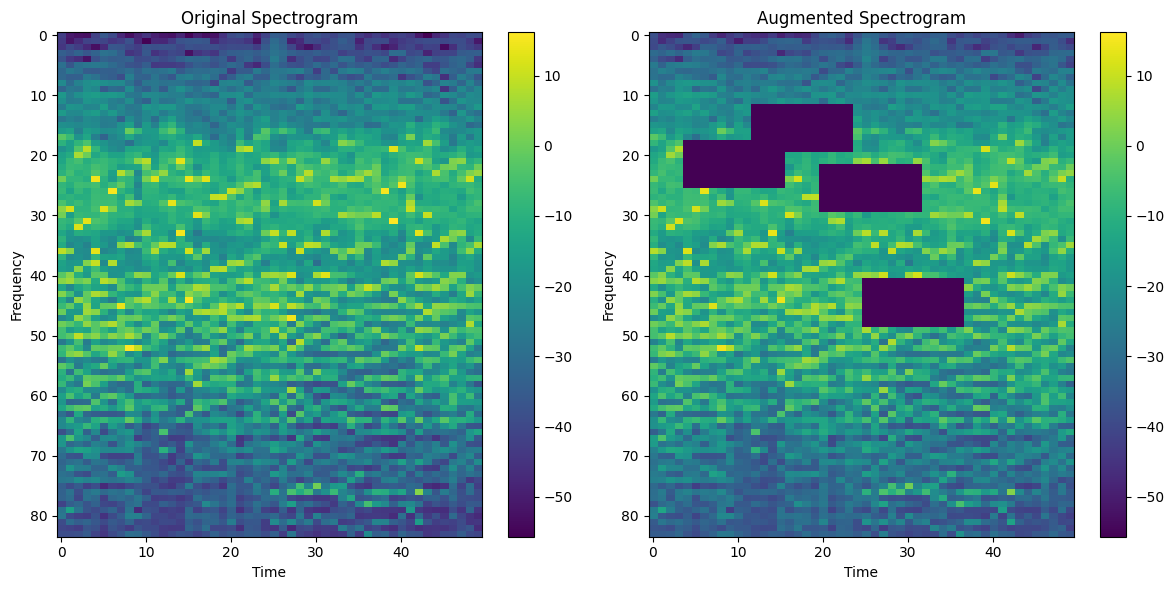

In [22]:
from matplotlib import pyplot as plt

index = 29

# Вычисляем vmin и vmax на основе немаскированной спектрограммы
data.augmentations = False
item = np.array(data[index]['anchor'])
vmin, vmax = item.min(), item.max()

# Включаем аугментацию и получаем маскированную спектрограмму
data.augmentations = True
item_augmented = np.array(data[index]['anchor'])

# Создаем два столбца для отображения
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Отображаем оригинальную спектрограмму
axes[0].imshow(item.T, vmin=vmin, vmax=vmax, aspect='auto')
axes[0].set_title("Original Spectrogram")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Frequency")
axes[0].colorbar = fig.colorbar(axes[0].images[0], ax=axes[0])

# Отображаем спектрограмму с аугментацией
axes[1].imshow(item_augmented.T, vmin=vmin, vmax=vmax, aspect='auto')
axes[1].set_title("Augmented Spectrogram")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Frequency")
axes[1].colorbar = fig.colorbar(axes[1].images[0], ax=axes[1])

# Отображаем графики
plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import pyplot as plt
data.augmentations=False
data.augmentations=True
item = np.array(data[20]['anchor'])
print(item.shape)
# factor = random.uniform(0.8,1.2)
# factor = 0.8
# new_item = change_tempo_cqt(item.T, 1)
# print(new_item.shape)
plt.imshow(item.T)

In [ ]:
data.augmentations=False


In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline

def apply_smooth_eq(cqt_spectrogram, smoothness=5):
    num_bins = cqt_spectrogram.shape[1]
    x = np.linspace(0, num_bins - 1, num_bins)
    random_points = np.random.uniform(0.5, 1.5, size=(smoothness,))
    print(random_points)
    spline = UnivariateSpline(np.linspace(0, num_bins - 1, smoothness), random_points, s=0)
    eq_curve = spline(x)
    # print(eq_curve)
    plt.plot(eq_curve)
    print(eq_curve.shape)
    print(cqt_spectrogram.shape)
    return cqt_spectrogram * eq_curve

In [ ]:
item.shape

In [ ]:
new_item.shape

In [ ]:
new_item = apply_smooth_eq(item)
new_item /= item
print(new_item, new_item.shape)

In [ ]:
item = np.array(data[15]['anchor'])
# factor = random.uniform(0.8,1.2)
factor = 0.8
new_item = change_tempo_cqt(item.T, 1)
print(new_item.shape)
plt.imshow(new_item)

In [ ]:
plt.imshow(cqt_spectrogram)

In [ ]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

for i, item in enumerate([new_item]):
    cqt_spectrogram = item  # Получаем данные спектрограммы
    
    ax = axs[i // 5, i % 5]
    ax.imshow(cqt_spectrogram, aspect='auto', origin='lower')
    ax.set_title(f"ID: {item['anchor_id']}")
    ax.axis('off')

plt.suptitle(f"CQT-спектрограммы треков из клики {random_clique_id}")
plt.show()


In [ ]:
new_item.shape

In [ ]:
model.eval()
out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

In [ ]:
out